<a href="https://colab.research.google.com/github/valesierrai/Integracion-de-Datos-y-Prospectiva/blob/main/Integraci%C3%B3n_Din%C3%A1mica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Integración Dinámica**

##0. Se procede con la carga e instalación de las librerias de trabajo

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##1. Se procede con la carga de los archivos de trabajo

In [ ]:
nxl = "/content/drive/MyDrive/Colab Notebooks/Integración de Datos y Prospectiva/Bases de Datos/6. NBA_Data.xlsx"
XDB = pd.read_excel(nxl, sheet_name=0)
XDB.head(10)

,player_number,salary,age,height,weight,games_played,games_started,minutes_per_game,FG_made,FG_attempted,...,FT_attempted,FT_percent,offensive_rebounds,defensive_rebounds,assists,blocks,steals,personal_fouls,turnovers,points
0,1,947276,36,79,260,966,838,32.4,4.8,11.6,...,3.7,0.716,1.2,3.4,2.7,0.5,1.8,2.7,1.8,13.5
1,2,25000000,37,78,212,1346,1198,36.1,8.7,19.5,...,7.4,0.837,1.1,4.1,4.7,0.5,1.4,2.5,3.0,25.0
2,3,4088019,39,78,220,1274,954,32.4,6.8,15.5,...,4.6,0.800,1.2,3.4,3.4,0.6,1.1,2.8,1.9,18.8
3,4,5675000,36,77,195,1100,432,30.9,5.4,13.1,...,3.5,0.861,0.4,2.0,3.6,0.2,1.0,1.6,2.0,15.5
4,5,5250000,40,83,250,1392,1389,34.0,7.4,14.6,...,6.1,0.696,2.8,8.1,3.0,2.2,0.7,2.4,2.4,19.0
5,6,8500000,39,83,240,1462,1425,34.5,7.2,14.5,...,4.2,0.789,2.2,7.8,3.7,1.4,1.3,2.4,2.2,17.8
6,7,2814000,38,78,205,923,349,26.3,4.6,10.1,...,4.2,0.827,0.7,3.0,4.0,0.3,1.4,2.1,2.1,14.0
7,8,250750,40,75,200,1304,939,30.9,4.6,10.0,...,3.8,0.807,1.1,2.6,6.5,0.2,1.2,2.2,2.4,12.5
8,9,947276,36,80,218,1012,569,27.3,4.0,8.6,...,1.7,0.769,0.6,3.7,2.6,0.2,0.6,2.0,1.5,10.8
9,10,222888,38,82,250,1005,354,15.8,2.4,4.9,...,1.6,0.640,1.8,2.9,0.4,0.6,0.4,2.1,0.9,5.8


In [ ]:
#Incluimos solo las que necesitamos
XDB= XDB.iloc[:,1:6]
XDB.dropna()
XDB.head(10)

,salary,age,height,weight,games_played
0,947276,36,79,260,966
1,25000000,37,78,212,1346
2,4088019,39,78,220,1274
3,5675000,36,77,195,1100
4,5250000,40,83,250,1392
5,8500000,39,83,240,1462
6,2814000,38,78,205,923
7,250750,40,75,200,1304
8,947276,36,80,218,1012
9,222888,38,82,250,1005


##**2. Se procesde con el proceso de Clusterización Estática - K Means**

In [ ]:
#Fijamos la semilla
np.random.seed(42)

In [ ]:
#1. Se deben crear las semillas iniciales

#Valores máximos
XDBM = np.max(XDB, axis=0)

#Valores mínimos
XDBm = np.min(XDB, axis=0)

XC= np.zeros((5,5))

#Ciclo
for i in range(5): #Número de motoncitos (clústers)
  for j in range(5): #Cada montoncito va a tener 5 variables
    XC[i,j] = np.random.uniform(XDBm[j],XDBM[j])

print(XC.astype(int)) #Mostrarlo como números enteros

[[ 9433206       39       82      248      238]
 [ 3993922       23       84      248     1038]
 [  623762       39       83      192      275]
 [ 4676117       28       78      224      434]
 [15339579       25       74      214      673]]


In [ ]:
#2. Se procede con la clasificación de los datos por montoncito(clúster)
#Cambiamos XDB a un array
XDB = np.array(XDB)

#Clústers Después
XCd= np.zeros((5,5))
ND = np.zeros((5,1))

#Creamos el ciclo
for k in range(len(XDB)):
  d = np.sum(np.abs(XC[:,:]-XDB[k,:]), axis=1) #Distancia de un registro a un clúster
  fila = np.argmin(d) #Número de clúster al que pertenece un dato

  XCd[fila,]=XCd[fila,]+XDB[k,:] #Voy sumando la información de las variables a los clústers
  ND[fila,]= ND[fila,]+1 #Cuento el número de datos que quedaron por clúster

print("El número de datos por clúster es:", ND)

El número de datos por clúster es: [[50.]
 [42.]
 [62.]
 [45.]
 [50.]]


In [ ]:
#Sacamos los promedios
XCd = XCd/ND #Ahora dividimos todos las variables por el número de clústers

#Hacemos el DataFrame
dfxco= pd.DataFrame((XCd.astype(float)))
dfxco.columns=['Salary', 'Age', 'Height', 'Weight', 'games_played']
dfxco.head(5)

,Salary,Age,Height,Weight,games_played
0,9.541074e+06,28.920000,79.140000,223.080000,589.720000
1,3.337586e+06,30.333333,78.904762,225.214286,558.214286
2,1.020454e+06,30.741935,79.096774,221.919355,546.580645
3,5.573482e+06,29.955556,78.911111,221.377778,565.000000
4,1.669724e+07,28.140000,79.820000,229.320000,572.300000


In [ ]:
#Correlación entre las variables
dfcor= pd.DataFrame((XDB)).corr()
dfcor.head()

,0,1,2,3,4
0,1.000000,-0.243711,0.069705,0.098346,0.066004
1,-0.243711,1.000000,0.005723,0.015531,0.787159
2,0.069705,0.005723,1.000000,0.857509,-0.022546
3,0.098346,0.015531,0.857509,1.000000,0.011834
4,0.066004,0.787159,-0.022546,0.011834,1.000000


*Si usted tiene más edad le pagan menos (correlación negativa)

<Axes: >

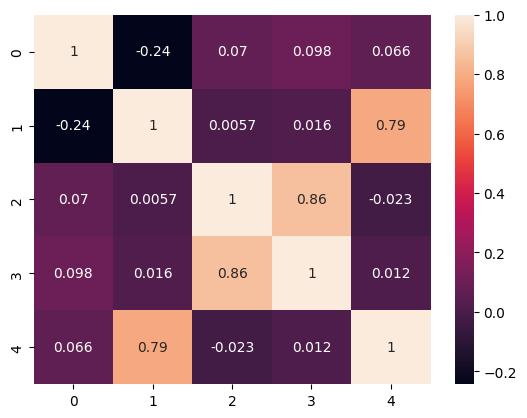

In [ ]:
#Mapa de calor - Correlación (Visual)
sns.heatmap(dfcor, annot=True)

##**3.Integración Dinámica - K Medoids**

**1. Se procede con la carga de los datos externos**

In [ ]:
#Se carga la base de datos
nxle= '/content/drive/MyDrive/Colab Notebooks/Integración de Datos y Prospectiva/Bases de Datos/6. NBA_Data.xlsx'
XDBe= pd.read_excel(nxle, sheet_name=4)

#Variables que nos interesan
XDBe= np.array(XDBe.iloc[:,1:6].dropna())
print("Los datos externos son:\n", XDBe)

Los datos externos son:
 [[  981348       25       79      240      219]
 [ 3873398       23       80      225      307]
 [ 3533333       25       78      175      254]
 [ 5694674       22       77      207      247]
 [ 6796117       25       78      235      311]
 [  947276       24       76      195       84]
 [ 7070730       23       82      253      260]
 [ 3272091       22       83      279      304]
 [ 2008748       26       83      265      170]
 [ 2288205       23       79      205      251]
 [14260870       26       79      230      321]
 [ 2894059       23       81      215      279]
 [ 2943221       25       83      229      257]
 [  981348       25       76      215      141]
 [   55722       27       77      220      103]
 [ 2489530       24       81      252      178]
 [ 6331404       22       79      232      202]
 [ 3034356       23       77      185      214]
 [ 3075880       24       85      245      225]
 [ 4236287       25       75      195      321]
 [ 2144772     

In [ ]:
#2. Mantenemos el historial de los clústers
XCe = np.copy(XCd) #Clúster estático o inicial

#Número de datps que se integraron por clúster
NDe = np.zeros((5,1))

nf= np.zeros((len(XDBe),1)) #Saber la fila de integración o clúster de recepción

#Distancia
for k in range (len(XDBe)):
  de = np.sqrt(np.sum((XCe[:,:]-XDBe[k,:])**2,axis=1)) #Distancia de un dato externo a los clústers internos
  fila=np.argmin(de)
  nf[k,]=fila
  XCe[fila,]= (XCe[fila,]+XDBe[k,:])/2 #Voy sumando la información de las variables a los clústers

  NDe[fila,]= NDe[fila,]+1 #Cuento el número de datos que quedaron por clúster

print("El número de datos externos integrados por clúster es\n:", NDe)

El número de datos externos integrados por clúster es
: [[  0.]
 [ 46.]
 [133.]
 [ 15.]
 [  2.]]


In [ ]:
print("La estructura de los clústers antes es\n:", pd.DataFrame(XCd))

La estructura de los clústers antes es
:               0          1          2           3           4
0  9.541074e+06  28.920000  79.140000  223.080000  589.720000
1  3.337586e+06  30.333333  78.904762  225.214286  558.214286
2  1.020454e+06  30.741935  79.096774  221.919355  546.580645
3  5.573482e+06  29.955556  78.911111  221.377778  565.000000
4  1.669724e+07  28.140000  79.820000  229.320000  572.300000


In [ ]:
print("La estructura de los clústers después es\n:", pd.DataFrame(XCe))

La estructura de los clústers después es
:               0          1          2           3           4
0  9.541074e+06  28.920000  79.140000  223.080000  589.720000
1  2.998603e+06  19.888727  78.533124  215.260867   72.801505
2  9.240015e+05  21.548588  79.995629  199.007493   18.998757
3  5.239705e+06  20.271056  79.947019  220.888378   87.017883
4  1.508953e+07  25.535000  79.705000  231.830000  356.825000


In [ ]:
#Los cambios porcentuales son:
print("Los cambios porcentuales fueron;\n", (XCd-XCe)/XCd)

Los cambios porcentuales fueron;
 [[ 0.          0.          0.          0.          0.        ]
 [ 0.10156527  0.34432767  0.00470996  0.04419533  0.86958144]
 [ 0.09451899  0.29904909 -0.01136399  0.10324409  0.96524071]
 [ 0.05988654  0.32329562 -0.01312753  0.0022107   0.84598605]
 [ 0.09628625  0.09257285  0.00144074 -0.0109454   0.37650708]]


##4. Informe de Integración

In [ ]:
dfinf = pd.DataFrame(np.column_stack((nf,XDBe)))
dfinf.columns=['Clúster de recepción', 'Salary', 'Age', 'Height', 'Weight', 'games_played']
dfinf.head(10)

,Clúster de recepción,Salary,Age,Height,Weight,games_played
0,2.0,981348.0,25.0,79.0,240.0,219.0
1,1.0,3873398.0,23.0,80.0,225.0,307.0
2,1.0,3533333.0,25.0,78.0,175.0,254.0
3,3.0,5694674.0,22.0,77.0,207.0,247.0
4,3.0,6796117.0,25.0,78.0,235.0,311.0
5,2.0,947276.0,24.0,76.0,195.0,84.0
6,3.0,7070730.0,23.0,82.0,253.0,260.0
7,1.0,3272091.0,22.0,83.0,279.0,304.0
8,2.0,2008748.0,26.0,83.0,265.0,170.0
9,2.0,2288205.0,23.0,79.0,205.0,251.0


In [ ]:
#Exportamos a Excel
dfinf.to_excel('Informe de Integración.xlsx')

##**5. Análisis de Resultados**

En la integración de los datos se puede observar que el clúster que tuvo la menor integración o una integración nula fue el clúster 0, es por esto que los valores asociados a los clústers tuvieron una variación nula tal como se puede observar en la matriz de variaciones porcentuales. Se destaca el clúster 2, el cual tuvo la mayor cantidad de datos de integración. Sin embargo, esta integración tuvo variaciones por encima del 80% en promedio con respecto a la variable "games_played". Por ende es que se requiere establecer controles de integración con el fin de que los datos no tengan variaciones tan fuertes que pueden afectar la estructura de los clúster originales o asociados con la base de datos observada.